In [1]:
import cv2
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(r"C:\Users\vaishnavi.singh\Documents\DataSet\dogs.jpeg")
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = 'dogs.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

[[253 251 250]
 [ 13   8   8]
 [190 151 120]
 [233 203 174]
 [ 68  53  48]]


In [2]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open(r'C:\Users\vaishnavi.singh\Documents\DataSet\dogs.jpeg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters
cluster centres:
 [[253.18598743 252.38427597 251.10496056]
 [193.10613718 153.96101083 122.58844765]
 [234.83762178 206.7469398  178.77816638]
 [ 63.27052359  48.27569489  44.87297996]
 [ 10.8403182    6.75649981   6.77435002]]
most frequent is [253.18598743 252.38427597 251.10496056] (#fdfcfb)


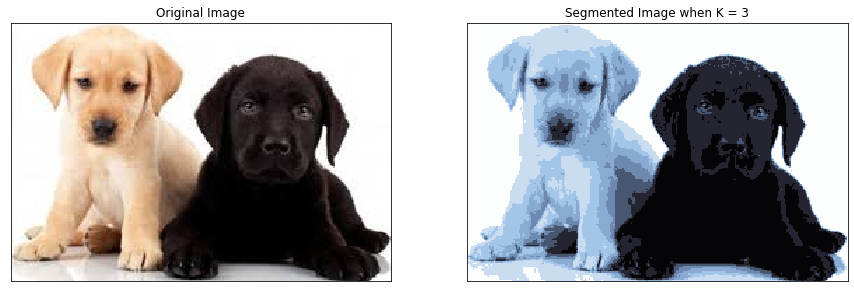

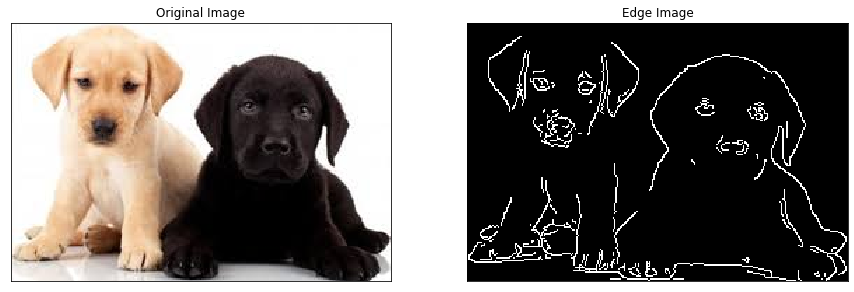

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread(r"C:\Users\vaishnavi.singh\Documents\DataSet\dogs.jpeg")
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
from PIL import Image
import numpy as np

im = Image.open(r"C:\Users\vaishnavi.singh\Documents\DataSet\dogs.jpeg")
col,row =  im.size
data = np.zeros((row*col, 5))
pixels = im.load()
for i in range(row):
    for j in range(col):
        r,g,b =  pixels[i,j]
        data[i*col + j,:] = r,g,b,i,j

IndexError: image index out of range